### 모듈 불러오기

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

### 변수 정의 

In [26]:
label: dict = {0: "가위", 1: "보"} # object's name
img_size: int = 50
train_times: int = 1000
img_number: int = 50

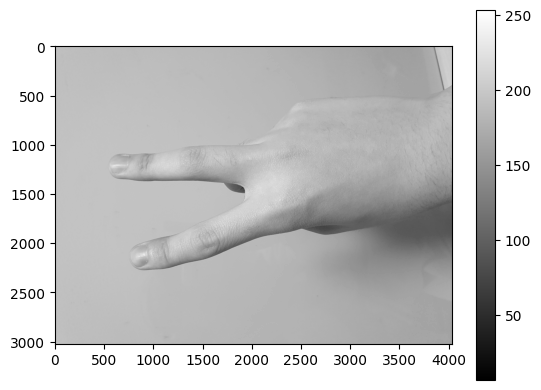

In [27]:
img_list = []

for i in range(img_number):
    try:
        img_list.append(Image.open(f"img/{i}.jpg").convert("L"))
    except:
        try:
            img_list.append(Image.open(f"img/{i}.jpeg").convert("L"))
        except:
            img_list.append(Image.open(f"img/{i}.png").convert("L"))
### ###
plt.imshow(img_list[0], cmap="gray")
plt.colorbar()
plt.show()

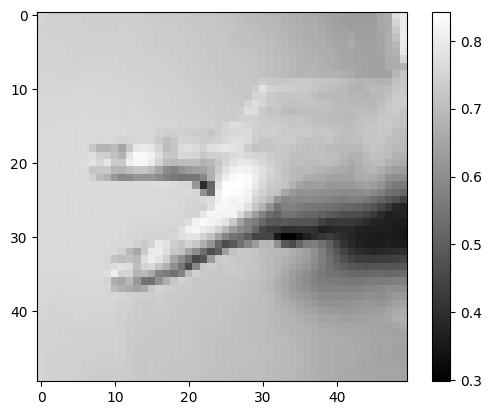

In [28]:
resized_img_list = []

for i in range(img_number):
    resized_img_list.append(np.array(img_list[i].resize((img_size, img_size))).reshape(1, -1)[0]/255.)

X = np.array(resized_img_list)
### ###
y_list = []

for i in range(20):
    y_list.append(0)
for j in range(30):
    y_list.append(1)

Y = np.array(y_list)
### ###
plt.imshow(np.array(img_list[0].resize((img_size, img_size)))/255., cmap="gray")
plt.colorbar()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               320128    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 321,418
Trainable params: 321,418
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 0s 33ms/step - loss: 1.2762 - accuracy: 0.4595 - val_loss: 0.1348 - val_accuracy: 1.0000
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.9034 - accuracy: 0.5405 - val_loss: 0.9582 - val_accuracy: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.9511 - accuracy: 0.4054 - val_loss: 1.5889 - val_accuracy: 0.0000e+00
Epoch 4/1000
4/

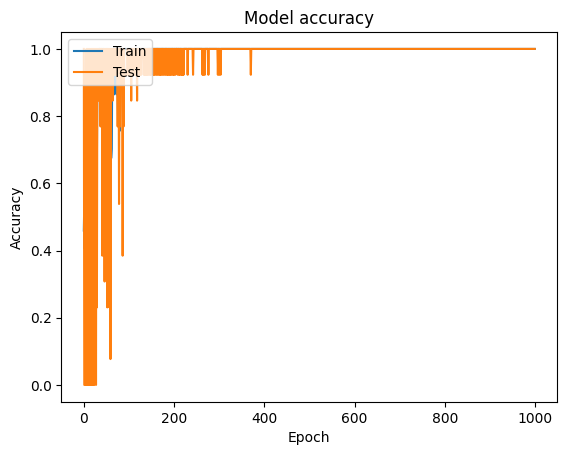

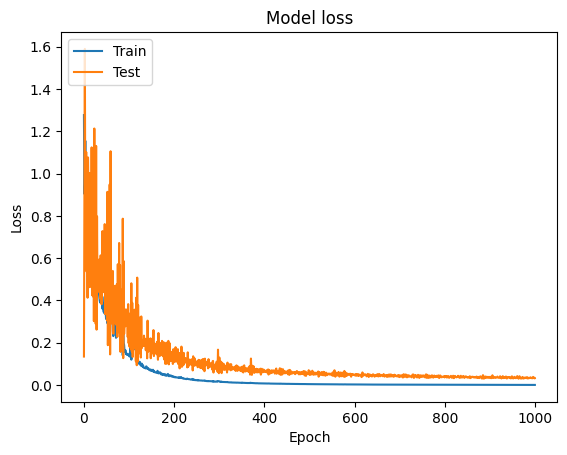

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[img_size**2,]),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

model.summary()
### ###
history = model.fit(X, Y,
          epochs=train_times,
          batch_size= 10,
          validation_split=0.25)

# train history visualization(accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 train history visualization(loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
model.save("rocksissorpaper.h5")
new_model = tf.keras.models.load_model("rocksissorpaper.h5")

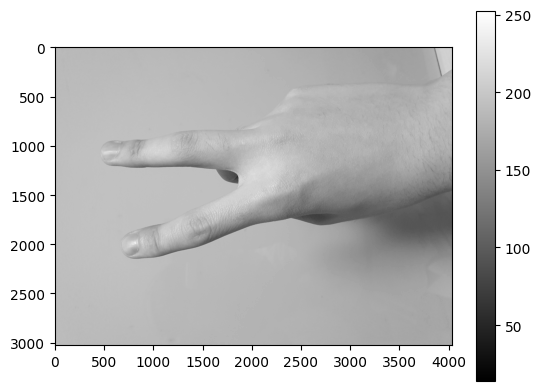

1/1 [==============================] - 0s 11ms/step
가위


In [36]:
# predict private image
test_img = Image.open("img/5.jpg").convert("L")
img = np.array(test_img.resize((img_size, img_size))).reshape(1, -1)[0]/255.
plt.imshow(np.array(test_img), cmap="gray")
plt.colorbar()
plt.show()

print(label[new_model.predict(np.array([img])).argmax()]) # show what object is